In [2]:
## Load Packages
## Install R Packages

install.packages("rsm")
library(rsm)

library(reshape2)

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Warning message:
“package ‘reshape2’ was built under R version 3.6.3”


In [15]:
## From https://www.itl.nist.gov/div898/handbook/pri/section4/pri473.htm

## R commands and output:

## Read data and save relevant variables.

fn.data.cost <- "https://raw.githubusercontent.com/wilsongis/3DP_Experiments/main/Data/cr6_cost.txt"
fn.data.time <- "https://raw.githubusercontent.com/wilsongis/3DP_Experiments/main/Data/cr6_time.txt"
df.time <- read.table(fn.data.time, header=TRUE)
str(df.time)

'data.frame':	16 obs. of  15 variables:
 $ lh   : int  -1 1 -1 1 -1 1 -1 1 -1 1 ...
 $ ps   : int  -1 -1 1 1 -1 -1 1 1 -1 -1 ...
 $ id   : int  -1 -1 -1 -1 1 1 1 1 -1 -1 ...
 $ wt   : int  -1 -1 -1 -1 -1 -1 -1 -1 1 1 ...
 $ rw   : int  1 -1 -1 1 -1 1 1 -1 -1 1 ...
 $ alh  : num  0.16 0.28 0.16 0.28 0.16 0.28 0.16 0.28 0.16 0.28 ...
 $ aps  : int  50 50 60 60 50 50 60 60 50 50 ...
 $ aid  : num  0.25 0.25 0.25 0.25 0.15 0.15 0.15 0.15 0.25 0.25 ...
 $ awt  : num  0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.8 0.8 ...
 $ arw  : num  0.8 1.2 1.2 0.8 1.2 0.8 0.8 1.2 1.2 0.8 ...
 $ time1: int  8741 18098 14493 10191 14914 10423 16648 8534 15085 10624 ...
 $ time2: int  8743 18042 14469 10185 14873 10199 16652 10149 15111 10624 ...
 $ time3: int  8777 17930 14478 10199 15060 10345 16658 8492 15108 10644 ...
 $ time4: int  8733 18026 14448 10118 15063 10421 16653 8480 15115 10646 ...
 $ time5: int  8736 17634 14360 10200 15026 10422 16565 8538 15122 10579 ...


In [16]:
# reshape data into long format
df <- melt(df.time, id.vars = c("lh", "ps", "id", "wt", "rw", "alh", "aps", "aid", "awt", "arw"), variable.name = "rep", value.name = "time")

In [17]:
## Fit full model.
z = lm(time ~ (alh+aps+aid+awt+arw)**2,data=df)
summary(z)


Call:
lm(formula = time ~ (alh + aps + aid + awt + arw)^2, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-6370.6   -86.3    -0.7    27.6 25359.4 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -95522.2    38534.3  -2.479 0.015825 *  
alh          208852.5    87325.0   2.392 0.019721 *  
aps            2111.7      641.4   3.292 0.001621 ** 
aid         -213627.2   104008.6  -2.054 0.044071 *  
awt           39419.8    26533.8   1.486 0.142283    
arw           80131.6    25302.2   3.167 0.002360 ** 
alh:aps       -5032.1     1331.7  -3.779 0.000348 ***
alh:aid      216391.7   133169.3   1.625 0.109091    
alh:awt     -123279.2    33292.3  -3.703 0.000446 ***
alh:arw       58335.4    33292.3   1.752 0.084526 .  
aps:aid        1705.9     1598.0   1.068 0.289756    
aps:awt         313.4      399.5   0.784 0.435734    
aps:arw       -1519.7      399.5  -3.804 0.000321 ***
aid:awt       40930.0    39950.8   1.025 0.309451    
aid:arw   

In [18]:

## Perform stepwise regression.
zz = step(z,direction="both")

Start:  AIC=1323.15
time ~ (alh + aps + aid + awt + arw)^2

          Df Sum of Sq        RSS    AIC
- aps:awt  1   7855058  825040746 1321.9
- aid:awt  1  13402119  830587808 1322.5
- aps:aid  1  14550474  831736162 1322.6
<none>                  817185688 1323.2
- aid:arw  1  26053596  843239285 1323.7
- alh:aid  1  33714254  850899943 1324.4
- alh:arw  1  39202800  856388488 1324.9
- awt:arw  1 164956192  982141881 1335.9
- alh:awt  1 175078114  992263802 1336.7
- alh:aps  1 182317411  999503100 1337.3
- aps:arw  1 184752968 1001938657 1337.5

Step:  AIC=1321.91
time ~ alh + aps + aid + awt + arw + alh:aps + alh:aid + alh:awt + 
    alh:arw + aps:aid + aps:arw + aid:awt + aid:arw + awt:arw

          Df Sum of Sq        RSS    AIC
- aid:awt  1  13402119  838442865 1321.2
- aps:aid  1  14550474  839591220 1321.3
<none>                  825040746 1321.9
- aid:arw  1  26053596  851094343 1322.4
- alh:aid  1  33714254  858755001 1323.1
+ aps:awt  1   7855058  817185688 1323.2
- alh:arw 

In [19]:

## generate ANOVA table for selected model
anova(update(zz,~1),zz)

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,79,2156560153,NA,NA,NA,NA
2,67,852993339,12,1303566813,8.532597,1.532647e-09


In [20]:
##> Analysis of Variance Table

summary(zz)


Call:
lm(formula = time ~ alh + aps + aid + awt + arw + alh:aps + alh:aid + 
    alh:awt + alh:arw + aps:arw + aid:arw + awt:arw, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-5221.5  -541.3  -328.8  -257.3 26508.5 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -129539.2    31244.8  -4.146 9.73e-05 ***
alh          208852.5    87197.4   2.395 0.019415 *  
aps            2640.9      501.1   5.270 1.56e-06 ***
aid          -95244.7    50108.7  -1.901 0.061636 .  
awt           64840.0    12527.2   5.176 2.24e-06 ***
arw           80131.6    25265.2   3.172 0.002288 ** 
alh:aps       -5032.1     1329.7  -3.784 0.000332 ***
alh:aid      216391.7   132974.7   1.627 0.108365    
alh:awt     -123279.2    33243.7  -3.708 0.000426 ***
alh:arw       58335.4    33243.7   1.755 0.083868 .  
aps:arw       -1519.7      398.9  -3.809 0.000305 ***
aid:arw       57067.5    39892.4   1.431 0.157211    
awt:arw      -35898.7     9973.1  -3.600 0.0006

In [21]:


##> Call:
##> lm(formula = uniformity ~ pressure + h2 + ph2, data = df)

##> Residuals:
##>     Min      1Q  Median      3Q     Max 
##> -0.9273 -0.3932  0.1479  0.3920  0.6295 

##> Coefficients:
##>              Estimate Std. Error t value Pr(>|t|)    
##> (Intercept) 11.195193   1.186352   9.437 3.13e-05 ***
##> pressure    -0.117395   0.025636  -4.579  0.00255 ** 
##> h2          -0.525696   0.186849  -2.813  0.02602 *  
##> ph2          0.011178   0.004053   2.758  0.02818 *  
##> ---
##> Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1 

##> Residual standard error: 0.6164 on 7 degrees of freedom
##> Multiple R-squared: 0.8695,     Adjusted R-squared: 0.8136 
##> F-statistic: 15.55 on 3 and 7 DF,  p-value: 0.001772


## Generate ANOVA table.
anova(zz)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
alh,1,466945152.2,466945152.2,36.6771037,7.082988e-08
aps,1,402712.2,402712.2,0.0316318,8.593748e-01
aid,1,17781208.2,17781208.2,1.3966591,2.414613e-01
awt,1,10598224.1,10598224.1,0.8324579,3.648342e-01
arw,1,1764180.0,1764180.0,0.1385709,7.108808e-01
alh:aps,1,182317411.3,182317411.3,14.3204712,3.315236e-04
alh:aid,1,33714254.4,33714254.4,2.6481509,1.083646e-01
alh:awt,1,175078113.8,175078113.8,13.7518467,4.255415e-04
alh:arw,1,39202800.0,39202800.0,3.0792592,8.386835e-02


In [7]:


##> Analysis of Variance Table

##> Response: uniformity
##>           Df  Sum Sq Mean Sq F value    Pr(>F)    
##> pressure   1 14.6296 14.6296 38.5022 0.0004431 ***
##> h2         1  0.2024  0.2024  0.5326 0.4891950    
##> ph2        1  2.8900  2.8900  7.6059 0.0281821 *  
##> Residuals  7  2.6598  0.3800                      
##> ---
##> Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1 


## Perform lack-of-fit test.
lof = factor(paste(pressure,h2,ph2))
inner.model = lm(uniformity ~ pressure + h2 + ph2, data = df)
outer.model = lm(uniformity ~ lof)
anova(inner.model, outer.model)

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,7,2.659781,NA,NA,NA,NA
2,2,1.146667,5,1.513114,0.5278306,0.7559018


ERROR: Error in data.frame(predict.lm(rline, interval = "confidence"), time): arguments imply differing number of rows: 80, 0


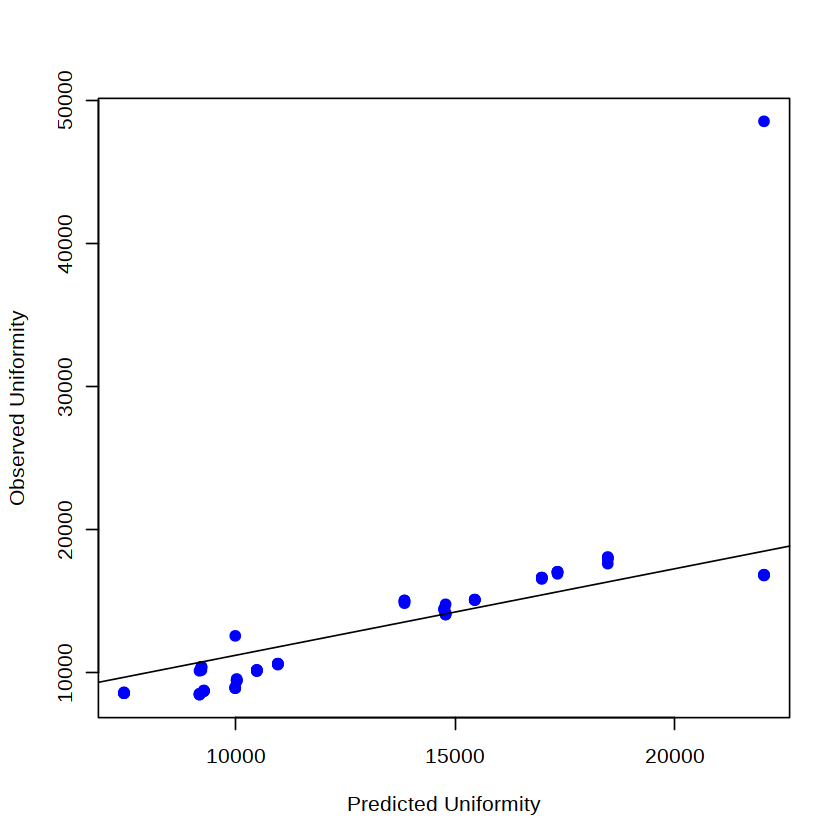

In [22]:
##> Analysis of Variance Table

##> Model 1: uniformity ~ pressure + h2 + ph2
##> Model 2: uniformity ~ lof
##>   Res.Df    RSS Df Sum of Sq      F Pr(>F)
##> 1      7 2.6598                           
##> 2      2 1.1467  5    1.5131 0.5278 0.7559


## Plot actual versus predicted.
par(mfrow=c(1,1),bg=rgb(1,1,0.8))
plot(predict(zz),df$time,ylab="Observed Uniformity",
     xlab="Predicted Uniformity", col=4, pch=19)
## Add regression line and confidence bounds to the plot.
rline = lm(predict(zz)~df$time)
abline(rline)
bnds = data.frame(predict.lm(rline, interval = "confidence"),time)
bnds = bnds[order(bnds$fit),]
lines(bnds$uniformity,bnds[,2],col=2)
lines(bnds$uniformity,bnds[,3],col=2)
par(mfrow=c(1,1))

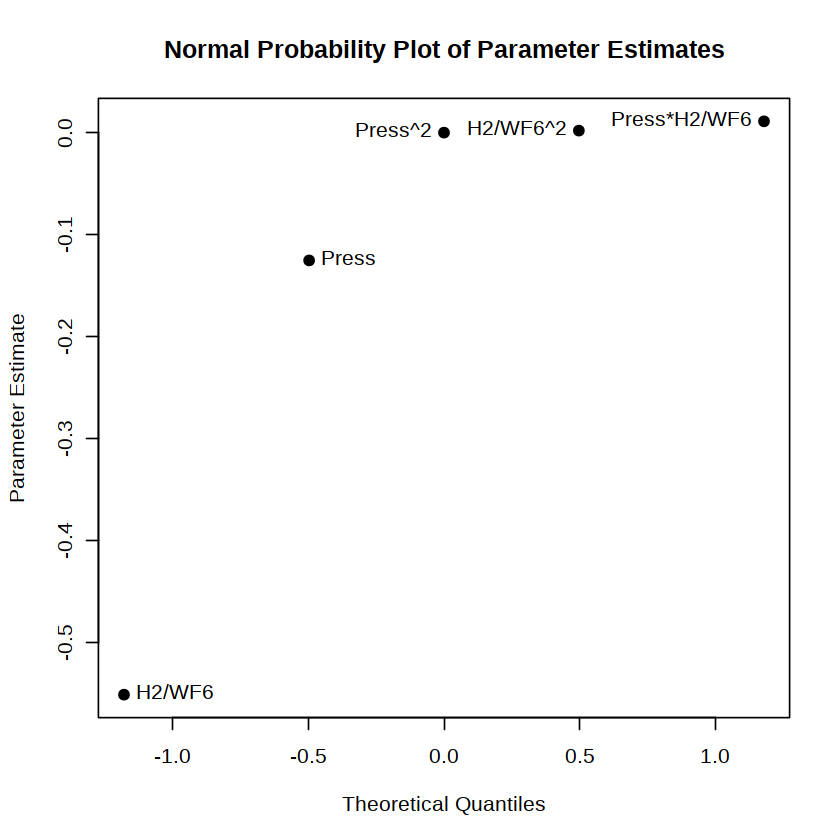

In [9]:
## Generate normal probability plot of the effects.
## Save parameters in a vector, but remove intercept.
qef = z$coef
qef = qef[-1]

## Sort effects and save labels.
sef = qef[order(qef)]
qlab = names(sef)
qlab=c("H2/WF6","Press","Press^2","H2/WF6^2","Press*H2/WF6")

## Generate theoretical quantiles.
ip = ppoints(length(sef))
zp = qnorm(ip)

## Generate normal probability plot of all effects (excluding the
## intercept).  
par(mfrow=c(1,1),bg=rgb(1,1,0.8))
plot(zp, sef, pch=19,
     ylab="Parameter Estimate", xlab="Theoretical Quantiles",
     main="Normal Probability Plot of Parameter Estimates")
##qqline(sef, col=2)
##abline(h=0, col=4)

## Add labels for effects.
small2 = c(1:(length(sef)-3))
text(zp[small2],sef[small2],label=qlab[small2],pos=4,cex=1)
text(zp[-small2],sef[-small2],label=qlab[-small2],pos=2,cex=1)

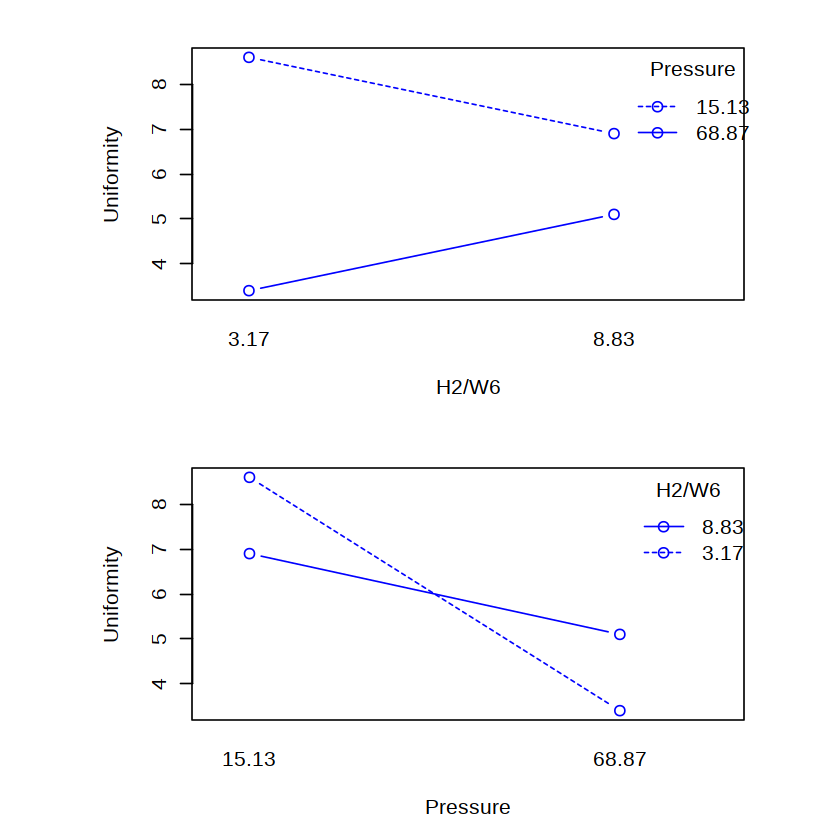

In [10]:
## Generate interaction plots.
dfp = subset(df,pressure==15.13|pressure==68.87)

par(mfrow=c(2,1), bg=rgb(1,1,0.8), mar=c(5, 8, 2, 4))
interaction.plot(dfp$h2, dfp$pressure, dfp$uniformity, fun=mean,
                 type="b", pch=c(21,21), col=4,
                 xlab="H2/W6", ylab="Uniformity", trace.lab="Pressure")

interaction.plot(dfp$pressure, dfp$h2, dfp$uniformity, fun=mean,
                 type="b", pch=c(21,21), col=4,
                 trace.lab="H2/W6", ylab="Uniformity", xlab="Pressure")

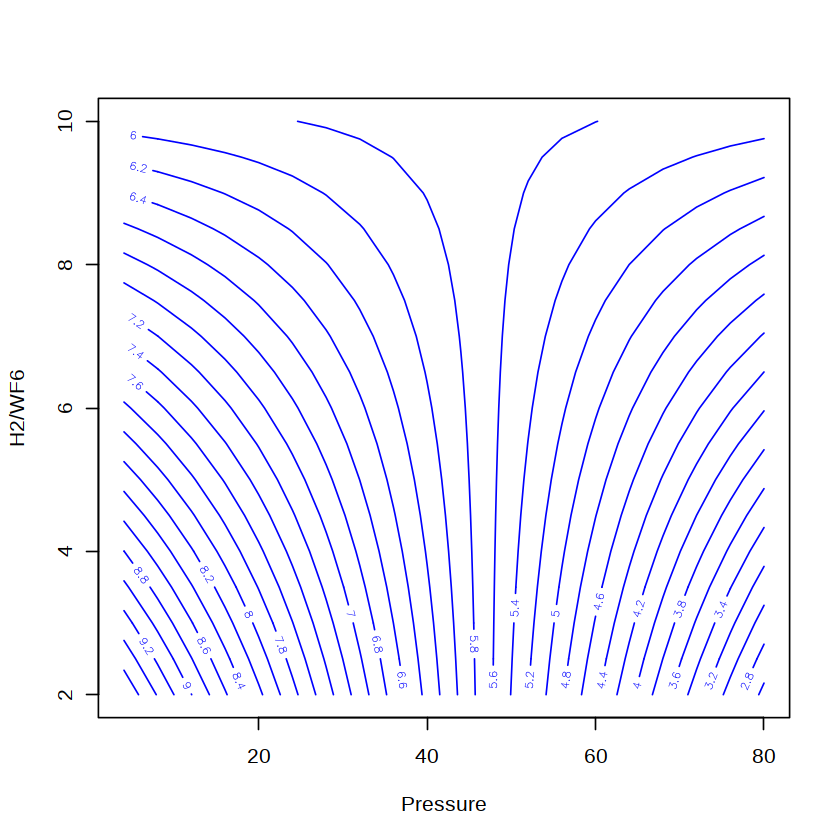

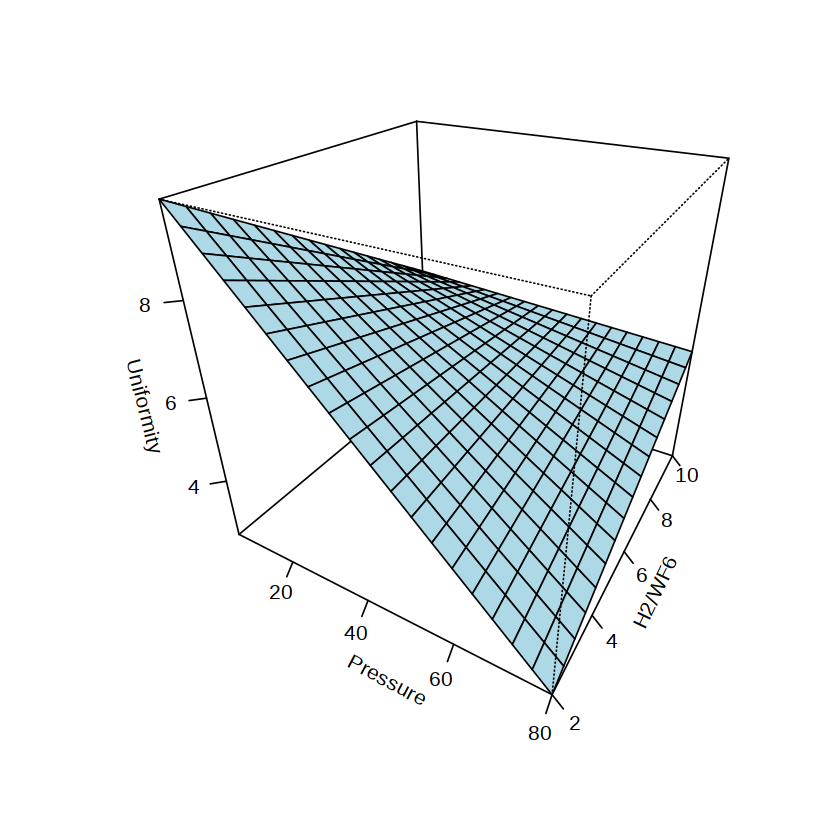

In [11]:
## Generate x and y data for plotting.
xord = seq(4,80,by=4)
yord = seq(2,10,by=.5)

## Generate predicted response surface and generate matrix of surface.
model = function (a, b){
  zz$coefficients[1] +
  zz$coefficients[2]*a +
  zz$coefficients[3]*b +
  zz$coefficients[4]*a*b}
pmatu = outer(xord,yord,model)


## Generate contour plot.
par(mfrow=c(1,1), bg=rgb(1,1,0.8))
contour(xord, yord, pmatu, nlevels=30, xlab="Pressure", ylab="H2/WF6",
        col="blue")
par(mfrow=c(1,1))


## Generate perspective plot.
par(mfrow=c(1,1), bg=rgb(1,1,0.8))
persp(xord, yord, pmatu, xlab="Pressure", ylab="H2/WF6", zlab="Uniformity",
      theta=30, phi=30, ticktype="detailed", col="lightblue") 
par(mfrow=c(1,1))


Call:
lm(formula = stress ~ pressure + h2 + ph2 + press2 + h22, data = df)

Residuals:
        1         2         3         4         5         6         7         8 
 0.042447 -0.010004 -0.019295  0.009363 -0.032516 -0.100004  0.033712 -0.012256 
        9        10        11 
-0.043644  0.022198  0.109996 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  5.427e+00  2.081e-01  26.073 1.55e-06 ***
pressure     4.748e-02  4.909e-03   9.671 0.000201 ***
h2           1.951e-01  5.350e-02   3.646 0.014803 *  
ph2          4.603e-04  5.025e-04   0.916 0.401714    
press2      -3.670e-04  4.454e-05  -8.240 0.000429 ***
h22         -7.498e-03  4.019e-03  -1.866 0.121067    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.07642 on 5 degrees of freedom
Multiple R-squared:  0.9919,	Adjusted R-squared:  0.9838 
F-statistic: 122.3 on 5 and 5 DF,  p-value: 3.192e-05


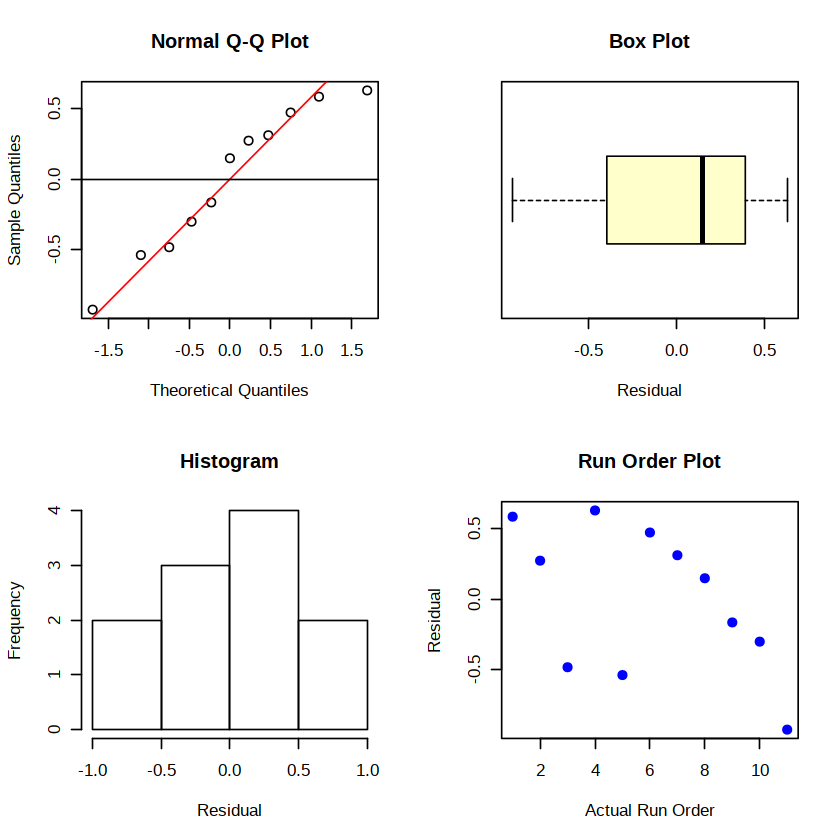

In [12]:
## Generate four plots of residuals.
par(mfrow=c(2,2), bg=rgb(1,1,0.8))
qqnorm(zz$residuals)
qqline(zz$residuals, col = 2)
abline(h=0)
boxplot(zz$residuals, horizontal=TRUE, main="Box Plot", xlab="Residual")
hist(zz$residuals, main="Histogram", xlab="Residual")
plot(run, zz$residuals, xlab="Actual Run Order", ylab="Residual",
     main="Run Order Plot", col=4, pch=19)
par(mfrow=c(1,1))


## Fit model
q = lm(stress ~ pressure+h2+ph2+press2+h22,data=df)
summary(q)

In [13]:
##> Call:
##> lm(formula = stress ~ pressure + h2 + ph2 + press2 + h22, data = df)

##> Residuals:
##>         1         2         3         4         5         6         7         8 
##>  0.042447 -0.010004 -0.019295  0.009363 -0.032516 -0.100004  0.033712 -0.012256 
##>         9        10        11 
##> -0.043644  0.022198  0.109996 

##> Coefficients:
##>               Estimate Std. Error t value Pr(>|t|)    
##> (Intercept)  5.427e+00  2.081e-01  26.073 1.55e-06 ***
##> pressure     4.748e-02  4.909e-03   9.671 0.000201 ***
##> h2           1.951e-01  5.350e-02   3.646 0.014803 *  
##> ph2          4.603e-04  5.025e-04   0.916 0.401714    
##> press2      -3.670e-04  4.454e-05  -8.240 0.000429 ***
##> h22         -7.498e-03  4.019e-03  -1.866 0.121067    
##> ---
##> Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1 

##> Residual standard error: 0.07642 on 5 degrees of freedom
##> Multiple R-squared: 0.9919,     Adjusted R-squared: 0.9838 
##> F-statistic: 122.3 on 5 and 5 DF,  p-value: 3.192e-05 


## Perform stepwise regression.
stepq = step(q,direction="both")

Start:  AIC=-53.25
stress ~ pressure + h2 + ph2 + press2 + h22

           Df Sum of Sq     RSS     AIC
- ph2       1   0.00490 0.03410 -53.539
<none>                  0.02920 -53.245
- h22       1   0.02033 0.04954 -49.433
- h2        1   0.07766 0.10686 -40.975
- press2    1   0.39658 0.42579 -25.769
- pressure  1   0.54626 0.57547 -22.455

Step:  AIC=-53.54
stress ~ pressure + h2 + press2 + h22

           Df Sum of Sq     RSS     AIC
<none>                  0.03410 -53.539
+ ph2       1   0.00490 0.02920 -53.245
- h22       1   0.02033 0.05444 -50.395
- h2        1   0.11110 0.14521 -39.602
- press2    1   0.39658 0.43069 -27.643
- pressure  1   0.98214 1.01625 -18.200


In [14]:
##> Start:  AIC=-53.25
##> stress ~ pressure + h2 + ph2 + press2 + h22

##>            Df Sum of Sq     RSS     AIC
##> - ph2       1     0.005   0.034 -53.539
##> <none>                    0.029 -53.245
##> - h22       1     0.020   0.050 -49.433
##> - h2        1     0.078   0.107 -40.975
##> - press2    1     0.397   0.426 -25.769
##> - pressure  1     0.546   0.575 -22.455

##> Step:  AIC=-53.54
##> stress ~ pressure + h2 + press2 + h22

##>            Df Sum of Sq     RSS     AIC
##> <none>                    0.034 -53.539
##> + ph2       1     0.005   0.029 -53.245
##> - h22       1     0.020   0.054 -50.395
##> - h2        1     0.111   0.145 -39.602
##> - press2    1     0.397   0.431 -27.643
##> - pressure  1     0.982   1.016 -18.200

qq = lm(stress ~ pressure+h2+press2,data=df)

anova(qq,q)

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,7,0.05443544,NA,NA,NA,NA
2,5,0.02920319,2,0.02523225,2.160059,0.2108004


In [15]:


##> Analysis of Variance Table

##> Model 1: stress ~ pressure + h2 + press2
##> Model 2: stress ~ pressure + h2 + ph2 + press2 + h22
##>   Res.Df      RSS Df Sum of Sq      F Pr(>F)
##> 1      7 0.054435                           
##> 2      5 0.029203  2  0.025232 2.1601 0.2108


# ANOVA for reduced model for stress
anova(update(qq,~1),qq)

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,10,3.60005455,NA,NA,NA,NA
2,7,0.05443544,3,3.545619,151.9802,9.83914e-07


In [16]:


##> Analysis of Variance Table

##> Model 1: stress ~ 1
##> Model 2: stress ~ pressure + h2 + press2
##>   Res.Df    RSS Df Sum of Sq      F   Pr(>F)    
##> 1     10 3.6001                                 
##> 2      7 0.0544  3    3.5456 151.98 9.84e-07 ***
##> ---
##> Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

summary(qq)


Call:
lm(formula = stress ~ pressure + h2 + press2, data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.07576 -0.04519 -0.02985  0.04699  0.16647 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  5.567e+00  1.056e-01  52.706 2.32e-10 ***
pressure     4.819e-02  4.286e-03  11.241 9.84e-06 ***
h2           1.244e-01  1.102e-02  11.293 9.55e-06 ***
press2      -3.426e-04  4.912e-05  -6.974 0.000217 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.08818 on 7 degrees of freedom
Multiple R-squared:  0.9849,	Adjusted R-squared:  0.9784 
F-statistic:   152 on 3 and 7 DF,  p-value: 9.839e-07


In [17]:


##> Call:
##> lm(formula = stress ~ pressure + h2 + press2, data = df)

##> Residuals:
##>      Min       1Q   Median       3Q      Max 
##> -0.07576 -0.04519 -0.02985  0.04699  0.16647 

##> Coefficients:
##>               Estimate Std. Error t value Pr(>|t|)    
##> (Intercept)  5.567e+00  1.056e-01  52.706 2.32e-10 ***
##> pressure     4.819e-02  4.286e-03  11.241 9.84e-06 ***
##> h2           1.244e-01  1.102e-02  11.293 9.55e-06 ***
##> press2      -3.426e-04  4.912e-05  -6.974 0.000217 ***
##> ---
##> Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1 

##> Residual standard error: 0.08818 on 7 degrees of freedom
##> Multiple R-squared: 0.9849,     Adjusted R-squared: 0.9784 
##> F-statistic:   152 on 3 and 7 DF,  p-value: 9.84e-07 

## Generate anova table.
anova(qq)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
pressure,1,2.17573059,2.175730593,279.78304,6.675800e-07
h2,1,0.99166360,0.991663597,127.52069,9.549921e-06
press2,1,0.37822491,0.378224911,48.63696,2.165027e-04
Residuals,7,0.05443544,0.007776492,NA,NA


In [18]:


##> Analysis of Variance Table

##> Response: stress
##>           Df  Sum Sq Mean Sq F value    Pr(>F)    
##> pressure   1 2.17573 2.17573 279.783 6.676e-07 ***
##> h2         1 0.99166 0.99166 127.521 9.550e-06 ***
##> press2     1 0.37822 0.37822  48.637 0.0002165 ***
##> Residuals  7 0.05444 0.00778                      
##> ---
##> Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

## Perform lack-of-fit test.
lof = factor(paste(pressure,h2,ph2))
inner.model = lm(stress ~ pressure + h2 + press2, data = df)
outer.model = lm(stress ~ lof)
anova(inner.model, outer.model)

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,7,0.05443544,NA,NA,NA,NA
2,2,0.02220000,5,0.03223544,0.5808188,0.7301455


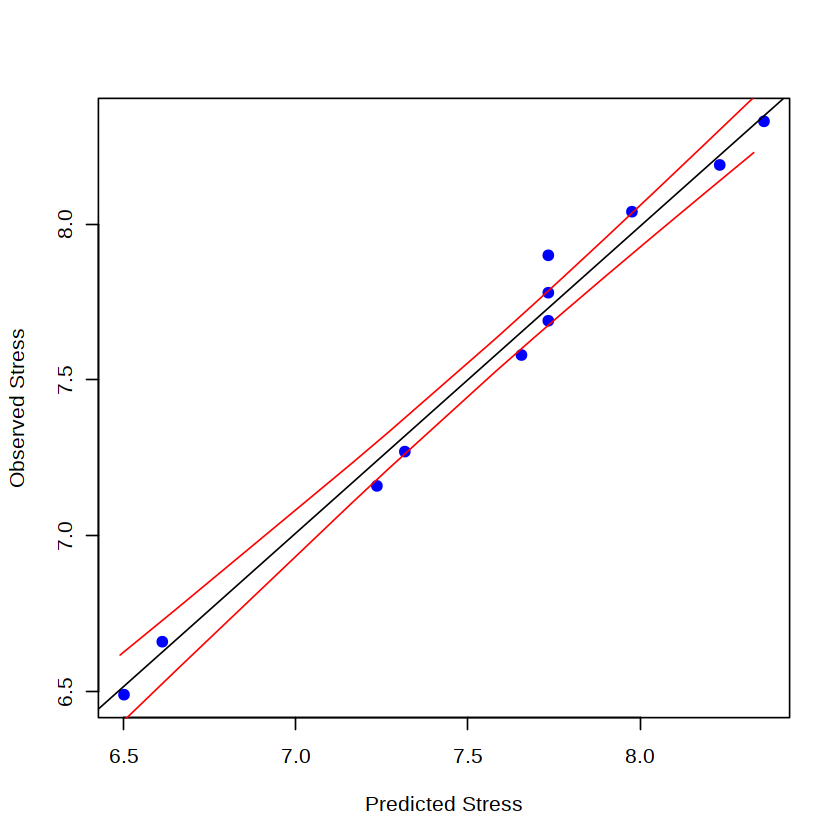

In [19]:

##> Analysis of Variance Table

##> Model 1: stress ~ pressure + h2 + press2
##> Model 2: stress ~ lof
##>   Res.Df      RSS Df Sum of Sq      F Pr(>F)
##> 1      7 0.054435                           
##> 2      2 0.022200  5  0.032235 0.5808 0.7301

## Plot actual versus predicted.
par(mfrow=c(1,1), bg=rgb(1,1,0.8))
plot(predict(qq),df$stress,ylab="Observed Stress",
     xlab="Predicted Stress", pch=19, col=4)
## Add regression line and confidence bounds to the plot.
rline = lm(predict(qq)~df$stress)
abline(rline)
bnds = data.frame(predict.lm(rline, interval = "confidence"), stress)
bnds = bnds[order(bnds$fit),]
lines(bnds$stress,bnds[,2], col=2)
lines(bnds$stress,bnds[,3], col=2)
par(mfrow=c(1,1))

In [20]:
## Generate normal probability plot of the effects.
## Save parameters in a vector, but remove intercept.
qef = q$coef
qef = qef[-1]

## Sort effects and save labels.
sef = qef[order(qef)]
qlab = names(sef)
qlab=c("H2/WF6^2","Press^2","Press*H2/WF6","Press","H2/WF6")

## Generate theoretical quantiles.
ip = ppoints(length(sef))
zp = qnorm(ip)

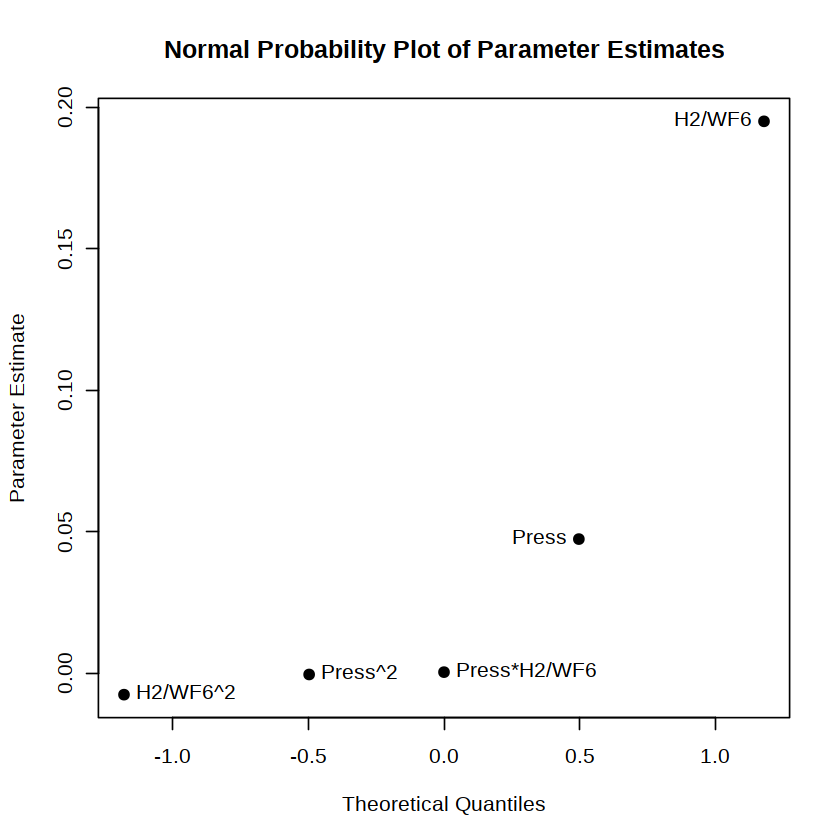

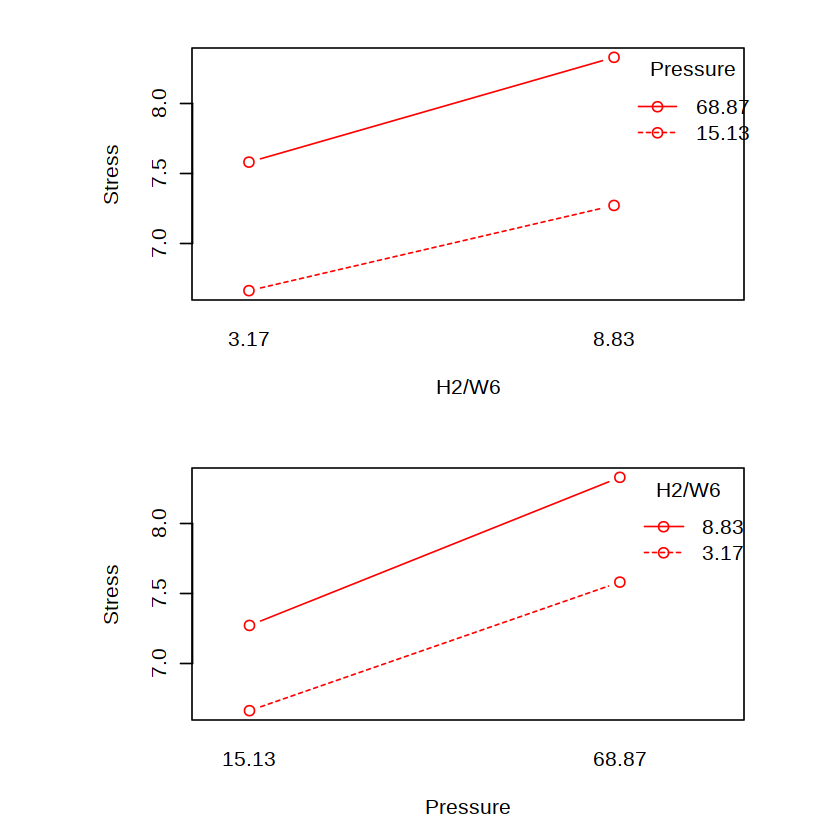

In [21]:

## Generate normal probability plot of all effects (excluding the
## intercept).  
par(mfrow=c(1,1),bg=rgb(1,1,0.8))
plot(zp, sef, pch=19,
     ylab="Parameter Estimate", xlab="Theoretical Quantiles",
     main="Normal Probability Plot of Parameter Estimates")
## Add labels for effects.
small2 = c(1:(length(sef)-2))
text(zp[small2],sef[small2],label=qlab[small2],pos=4,cex=1)
text(zp[-small2],sef[-small2],label=qlab[-small2],pos=2,cex=1)
par(mfrow=c(1,1))


## Generate interaction plots.
dfp = subset(df,pressure==15.13|pressure==68.87)

par(mfrow=c(2,1), bg=rgb(1,1,0.8), mar=c(5, 8, 2, 4))
interaction.plot(dfp$h2, dfp$pressure, dfp$stress, fun=mean,
                 type="b", pch=c(21,21), col=2,
                 xlab="H2/W6", ylab="Stress", trace.lab="Pressure")

interaction.plot(dfp$pressure, dfp$h2, dfp$stress, fun=mean,
                 type="b", pch=c(21,21), col=2,
                 trace.lab="H2/W6", ylab="Stress", xlab="Pressure")
par(mfrow=c(1,1), mar=c(5, 4, 4, 2)+0.1)

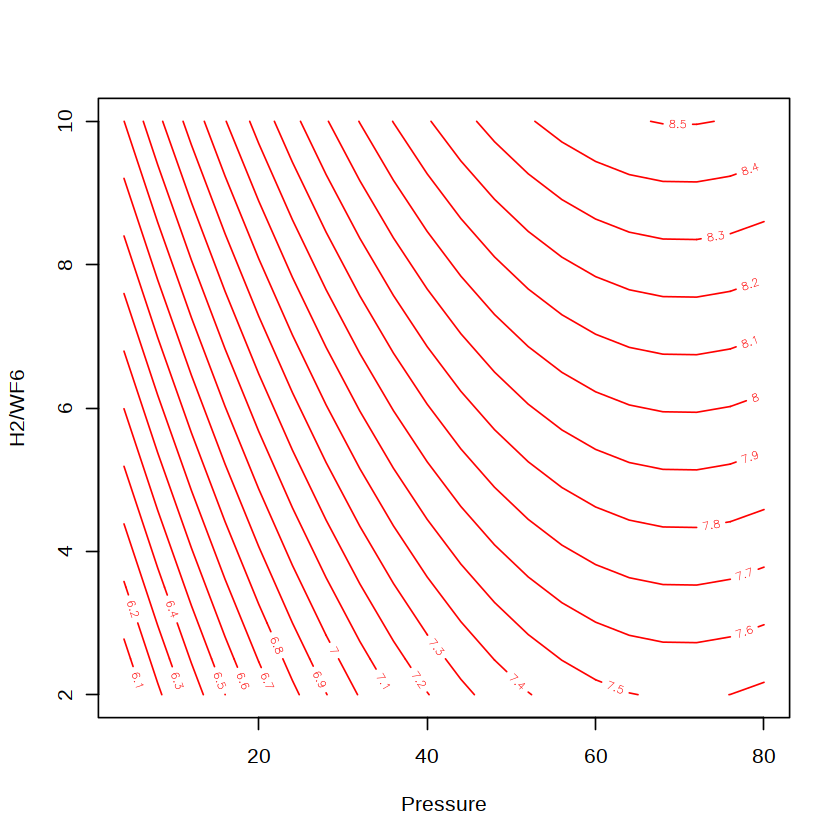

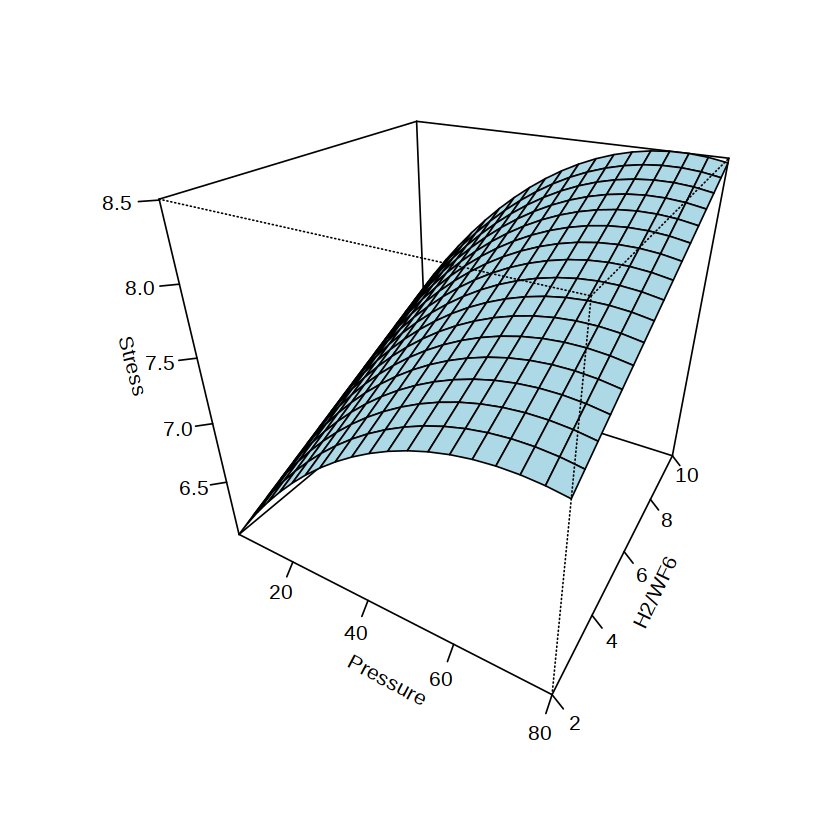

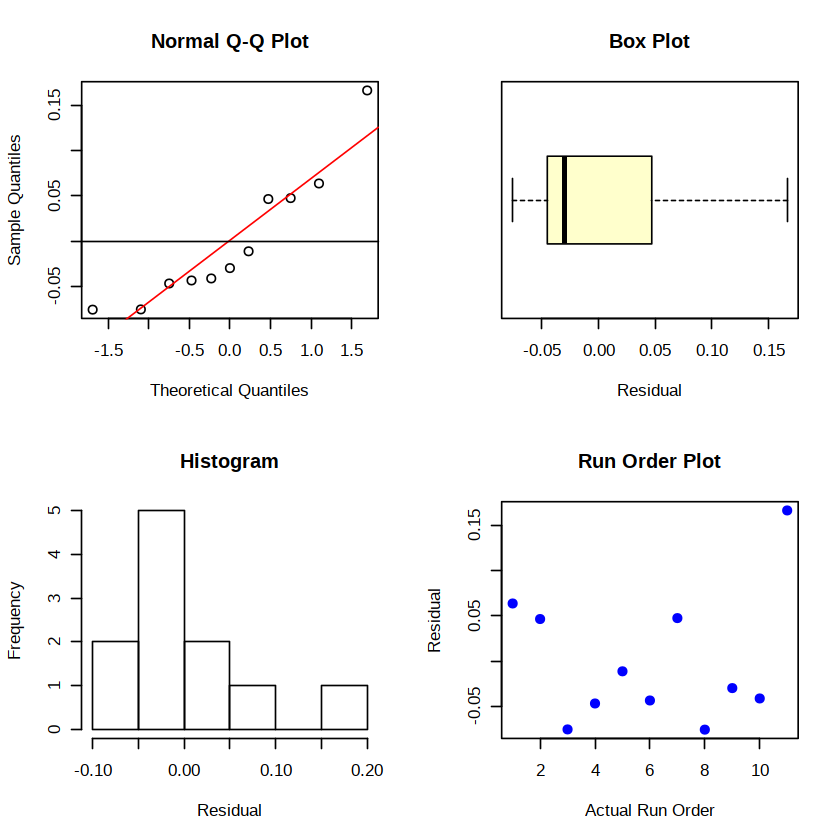

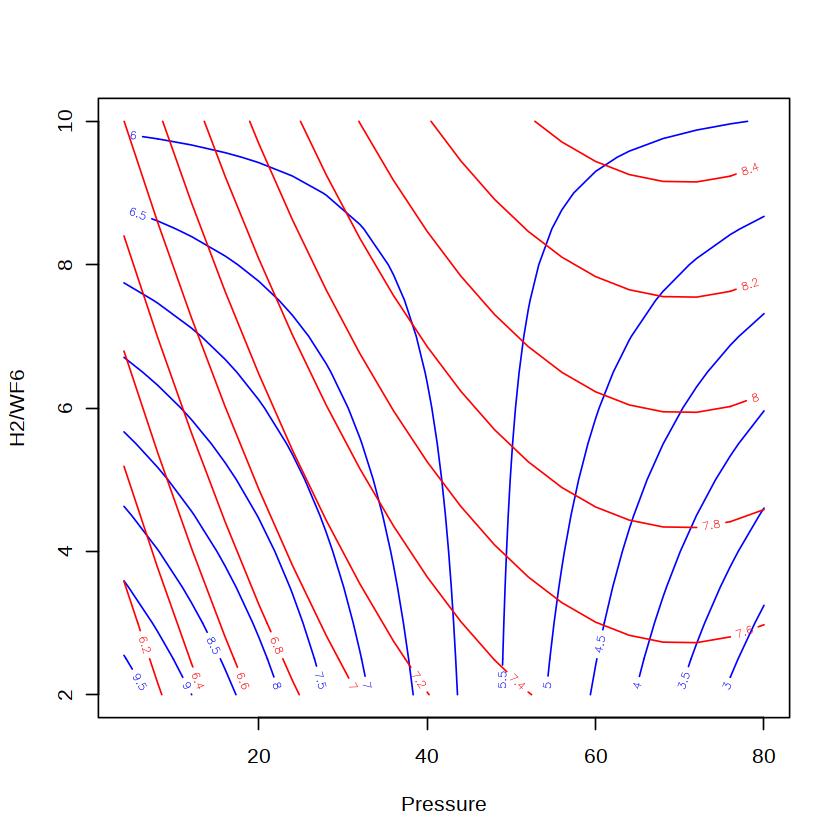

In [22]:
## Generate x and y data for plotting.
xord = seq(4,80,by=4)
yord = seq(2,10,by=.5)

## Generate predicted response surface and generate matrix of surface.
model = function (a, b){
  qq$coefficients[1] +
  qq$coefficients[2]*a +
  qq$coefficients[3]*b +
  qq$coefficients[4]*a*a}
pmats = outer(xord,yord,model)


## Generate contour plot.
par(mfrow=c(1,1), bg=rgb(1,1,0.8))
contour(xord, yord, pmats, nlevels=30, xlab="Pressure", ylab="H2/WF6",
        col="red")
par(mfrow=c(1,1))


## Generate perspective plot.
par(mfrow=c(1,1), bg=rgb(1,1,0.8))
persp(xord, yord, pmats, xlab="Pressure", ylab="H2/WF6", zlab="Stress",
      theta=30, phi=30, ticktype="detailed", col="lightblue") 
par(mfrow=c(1,1))


## Generate four plots of residuals.
par(mfrow=c(2,2), bg=rgb(1,1,0.8))
qqnorm(qq$residuals)
qqline(qq$residuals, col = 2)
abline(h=0)
boxplot(qq$residuals, horizontal=TRUE, main="Box Plot", xlab="Residual")
hist(qq$residuals, main="Histogram", xlab="Residual")
plot(run, qq$residuals, xlab="Actual Run Order", ylab="Residual",
     main="Run Order Plot", pch=19, col=4)
par(mfrow=c(1,1))


## Overlay uniformity and stress contour plots.
par(mfrow=c(1,1), bg=rgb(1,1,0.8))
contour(xord, yord, pmatu, nlevels=20, xlab="Pressure", ylab="H2/WF6",
        col="blue")
contour(xord, yord, pmats, nlevels=15, xlab="Pressure", ylab="H2/WF6",
        col="red",add=TRUE)
par(mfrow=c(1,1))
